In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import datetime 
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
%matplotlib inline

import platform
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
from matplotlib import style

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 십자인대, 아킬레스 카운트

In [2]:
df = pd.read_csv('nba_injury_1998.csv')
df.head()

Date       Team        Relinquished  \
0  1998-01-01    Celtics          Greg Minor   
1  1998-01-02    Blazers  Dontonio Wingfield   
2  1998-01-02    Bullets    Lorenzo Williams   
3  1998-01-02  Cavaliers     Mitchell Butler   
4  1998-01-02  Mavericks        Chris Anstey   

                                      Notes                  Notes2  
0                     placed on IL with flu                     flu  
1   placed on IR with left wrist tendinitis   left wrist tendinitis  
2    placed on IL with flu / sore knees (P)    flu / sore knees (P)  
3  placed on IL with herniated disc in neck  herniated disc in neck  
4     placed on IL with sprained left ankle     sprained left ankle

In [3]:
# 우선은 ACL과 아킬레스가 들어간  선수 구분
def yesno(x):
    words = x.split(' ')
    print(words)
    for word in words:
        if word.upper() in ['ACL', 'PCL', 'ACHILLES']:
            return True
            break   
df['tf'] = df['Notes2'].apply(lambda x:yesno(x))

['flu']
['left', 'wrist', 'tendinitis']
['flu', '/', 'sore', 'knees', '(P)']
['herniated', 'disc', 'in', 'neck']
['sprained', 'left', 'ankle']
['patella', 'tendinitis']
['flu']
['left', 'leg', 'stress', 'reaction']
['placed', 'in', 'IR', 'with', 'small', 'tear', 'in', 'right', 'hamstring']
['right', 'ankle', 'synovitis']
['sprained', 'right', 'foot']
['elbow', 'synovitis']
['sprained', 'right', 'ankle']
['sore', 'right', 'shoulder']
['hyperextended', 'left', 'knee']
['plantar', 'fasciitis', 'in', 'right', 'foot']
['strained', 'right', 'shoulder']
['left', 'knee', 'tendinitis']
['pulled', 'left', 'groin']
['fractured', 'left', 'clavicle', '(out', '6-8', 'weeks)']
['hamstring', 'injury', '(DNP)']
['sore', 'lower', 'back', '(DTD)']
['sprained', 'right', 'big', 'toe']
['strained', 'right', 'groin']
['flu']
['strained', 'right', 'calf']
['left', 'knee', 'tendinitis']
['broken', 'right', 'index', 'finger']
['surgery', 'on', 'left', 'knee', '(out', 'indefinitely)']
['patella', 'tendinitis']
[

['placed', 'on', 'IL']
['placed', 'on', 'IL']
['broken', 'left', 'hand']
['placed', 'on', 'IL']
['right', 'eye', 'corneal', 'abrasion']
['strained', 'groin']
['strained', 'right', 'hamstring']
['sprained', 'right', 'ankle']
['a', 'strained', 'right', 'hamstring']
['right', 'big', 'toe', 'tendinitis']
['srained', 'left', 'groin']
['broken', 'left', 'pinkie', 'finger', '(out', '3-4', 'weeks)']
['strained', 'lower', 'back']
['subluxated', 'left', 'shoulder']
['sprained', 'left', 'ankle']
['strained', 'arch', 'in', 'left', 'foot']
['strained', 'right', 'hamstring']
['hyperextended', 'right', 'elbow']
['a', 'strained', 'left', 'Achilled', 'tendon']
['appendectomy']
['strained', 'right', 'shoulder']
['right', 'knee', 'injury']
['right', 'knee', 'tendinitis']
['strained', 'right', 'hip']
['bruised', 'right', 'knee']
['sprained', 'MCL', 'in', 'right', 'knee']
['sprained', 'right', 'knee']
['right', 'knee', 'patella', 'tendinitis']
['left', 'foot', 'injury']
['strained', 'left', 'shoulder']
['s

['placed', 'on', 'IL']
['sprained', 'left', 'thumb']
['sprained', 'left', 'ankle']
['sprained', 'right', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['sore', 'right', 'knee']
['sore', 'left', 'knee']
['sore', 'lower', 'back']
['sprained', 'left', 'ankle']
['dislocated', 'finger']
['sore', 'left', 'knee']
['strained', 'right', 'shoulder']
['placed', 'on', 'IL']
['sore', 'right', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'leg', 'injury']
['sprained', 'left', 'ankle']
['strained', 'right', 'hamstring']
['placed', 'on', 'IL']
['hyperextended', 'right', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'knee', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['knee', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'arm', 'injur

['stomach', 'virus']
['placed', 'on', 'IL']
['sprained', 'left', 'knee']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'to', 'repair', 'broken', 'right', 'foot']
['sprained', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['stomach', 'flu']
['bruised', 'left', 'thigh']
['left', 'foot', 'injury']
['placed', 'on', 'IL']
['illness']
['illness']
['sprained', 'MCL', 'in', 'right', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['illness']
['placed', 'on', 'IL']
['fracture', 'in', 'lower', 'back']
['placed', 'on', 'IL', '(P)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['stomach', 'flu']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['bruised', 'hip']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL'

['left', 'shoulder', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['knee', 'injury', '(out', 'for', 'season)']
['placed', 'on', 'IL', 'for', 'rest']
['right', 'knee', 'injury']
['ankle', 'inflammation', '(CBC)', '/', 'knee', 'injury', '(P)']
['back', 'spasms']
['back', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'right', 'groin']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['right', 'ankle', 'injury']
['placed', 'on', 'IL', 'for', 'rest']
['strained', 'right', 'calf']
['back', 'spasms', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'left', 'hamstring']
['sore', 'left', 'knee']
['sore', 'right', 'ankle']
['strained', 'left', 'hamstring']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle', '(out', 'for', 'season)']
['illness']
['strained', 'left', 'calf', '(P)']
['legal', 'issues']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'wrist', 'injury']
['pl

['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['illness']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore/sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['concussion']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['Achilles', 'injury', '/', 'sprained', 'ankle', '/', 'illness']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['hyperextended/strained', 'right', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['illness']
['flu', '/', 'strep', 'throat']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'for', 'rest']
['b

['sore', 'left', 'hip']
['tailbone', 'injury']
['sprained', 'right', 'ankle']
['strained', 'lower', 'back']
['right', 'quadricep', 'injury']
['placed', 'on', 'IL']
['sore', 'right', 'ankle']
['left', 'hand', 'injury']
['sprained', 'left', 'ankle']
['illness']
['left', 'hamstring', 'injury']
['bruised', 'right', 'knee']
['flu']
['illness']
['sore', 'back']
['sore', 'left', 'knee']
['concussion']
['illness']
['concussion']
['placed', 'on', 'IL']
['right', 'fibula', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['illness']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['illness']
['fractured', 'finger']
['placed', 'on', 'IL']
['illness']
['placed', 'on', 'IL']
['sore', 'left', 'foot']
['fractured', 'finger']
['groin', 'injury']
['left', 'hamstring', 'injury']
['sore', 'right', 'ankle']
['sore', 'left', 'knee']
['left', 'knee', 'injury']
['left', 'shoulder', 'subluxation']
['groin', 'injury']
['sp

In [4]:
import re

# 시즌아웃 부상
def seasonout(x):
    words = re.split('\(|\)', x)
    print(words)
    for word in words:
        if word in ['out for season']:
            return True
            break
    
df['out']  = df['Notes2'].apply(lambda x:seasonout(x))
    

['flu']
['left wrist tendinitis']
['flu / sore knees ', 'P', '']
['herniated disc in neck']
['sprained left ankle']
['patella tendinitis']
['flu']
['left leg stress reaction']
['placed in IR with small tear in right hamstring']
['right ankle synovitis']
['sprained right foot']
['elbow synovitis']
['sprained right ankle']
['sore right shoulder']
['hyperextended left knee']
['plantar fasciitis in right foot']
['strained right shoulder']
['left knee tendinitis']
['pulled left groin']
['fractured left clavicle ', 'out 6-8 weeks', '']
['hamstring injury ', 'DNP', '']
['sore lower back ', 'DTD', '']
['sprained right big toe']
['strained right groin']
['flu']
['strained right calf']
['left knee tendinitis']
['broken right index finger']
['surgery on left knee ', 'out indefinitely', '']
['patella tendinitis']
['left knee tendinitis']
['left knee tendinitis']
['strained groin']
['strained abdomen & pulled groin']
['right ankle tendinitis']
['strained right hamstring']
['left knee patellar tendi

['right shoulder tendinitis']
['plantar fasciitis in right foot']
['sore right knee']
['a sore lower back']
['placed on IL']
['placed on IL']
['broken left hand']
['placed on IL']
['right eye corneal abrasion']
['strained groin']
['strained right hamstring']
['sprained right ankle']
['a strained right hamstring']
['right big toe tendinitis']
['srained left groin']
['broken left pinkie finger ', 'out 3-4 weeks', '']
['strained lower back']
['subluxated left shoulder']
['sprained left ankle']
['strained arch in left foot']
['strained right hamstring']
['hyperextended right elbow']
['a strained left Achilled tendon']
['appendectomy']
['strained right shoulder']
['right knee injury']
['right knee tendinitis']
['strained right hip']
['bruised right knee']
['sprained MCL in right knee']
['sprained right knee']
['right knee patella tendinitis']
['left foot injury']
['strained left shoulder']
['strained right ankle']
['broken right pinkie finger']
['left ankle tendinitis']
['torn lateral menis

['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL for rest']
['placed on IL for rest']
['left calf injury']
['placed on IL']
['placed on IL for rest']
['placed on IL for rest']
['sprained left ankle']
['sore left knee']
['placed on IL']
['placed on IL']
['sore left knee']
['placed on IL']
['sprained wrist and shoulder']
['sprained right ankle']
['placed on IL']
['placed on IL']
['placed on IL for rest']
['placed on IL for rest']
['hyperextended right knee']
['placed on IL']
['sprained left ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['partial tear in left hip muscle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['strained neck']
['placed on IL']
['placed on IL']
['partially torn plantar fascia in left foot']
['torn meniscus in left

['placed on IL']
['plantar fasciaitis in left foot']
['placed on IL']
['placed on IL']
['placed on IL']
['sore back']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['sore left ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['sore left ankle ', 'P', ' / knee injury ', 'CBC', '']
['illness']
['placed on IL']
['placed on IL']
['hip injury']
['strained left shoulder']
['placed on IL']
['placed on IL']
['sprained left ankle']
['sprained right ankle']
['back spasms']
['placed on IL']
['placed on IL']
['strained left hip flexor']
['sprained right ankle']
['placed on IL']
['placed on IL recovering from surgery on left foot to repair stress fracture']
['placed on IL']
['illness']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['sprained MCL in right knee / left knee ', 'CBC', '']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['flu']
['placed on IL']
['strained left calf']
['right hand injury']
['sprain

['placed on IL recovering from surgery on left knee']
['placed on IL recovering from surgery on right knee ', 'out for season', '']
['placed on IL recovering from surgery on left foot to repair fractured bone']
['placed on IL']
['placed on IL']
['sprained right ankle']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['back injury']
['rib injury']
['placed on IL']
['bruised chest']
['placed on IL']
['placed on IL']
['fractured right elbow']
['placed on IL']
['placed on IL']
['placed on IL']
['back injury']
['placed on IL']
['placed on IL']
['calf injury']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['back spasms']
['back injury']
['placed on IL']
['bruised left hip']
['placed on IL']
['placed on IL']
['stress fracture in left tibia ', 'out for season', '']
['placed on IL']
['flu/illness']
['sore back']
['stress reaction in left tibia']
['placed on IL']
['placed on IL']
['place

['placed on IL']
['placed on IL ', 'out for season', '']
['placed on IL']
['placed on IL']
['placed on IL']
['strained right calf']
['sprained right ankle']
['strained right hamstring ', 'out for season', '']
['placed on IL']
['sprained left ankle']
['placed on IL ', 'out for season', '']
['illness']
['placed on IL']
['placed on IL']
['left quadriceps injury ', 'out for season', '']
['placed on IL recovering from surgery on right hand to repair fracture ', 'out for season', '']
['placed on IL']
['placed on IL ', 'out for season', '']
['sprained MCL in right knee']
['sprained MCL in right knee ', 'out for season', '']
['placed on IL ', 'out for season', '']
['placed on IL']
['sprained MCL in right knee ', 'out for season', '']
['sprained right ankle']
['placed on IL']
['stomach flu']
['placed on IL ', 'out for season', '']
['placed on IL ', 'out for season', '']
['placed on IL']
['placed on IL']
['concussion']
['placed on IL']
['placed on IL']
['left knee injury ', 'out for season', '']

['left knee injury']
['placed on IL']
['sprained right elbow']
['bruised right quadriceps']
['strained left hamstring']
['sore left knee']
['sore right foot']
['left knee injury']
['concussion']
['placed on IL']
['placed on IL']
['sprained right ankle']
['placed on IL']
['plantar fascia in right foot']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['concussion']
['placed on IL']
['sprained right ankle']
['sore left ankle']
['lower back spasms']
['placed on IL']
['left big toe injury']
['sprained left ankle']
['sprained left ankle']
['left ankle injury']
['strained right adductor']
['placed on IL']
['sprained right ankle']
['placed on IL']
['placed on IL']
['fractured nose']
['sprained right shoulder']
['sprained left ankle']
['fractured jaw']
['sore right knee']
['placed on IL']
['placed on IL']
['placed on IL']
['placed on IL']
['right hip injury']
['stress fracture in right foot']
['placed on IL']
['bruised right quadriceps']
['placed on IL']
['placed on IL']
['

In [5]:
display(df[(df['out'] == True) | (df['tf'] == True)])
df[(df['out'] == True) | (df['tf'] == True)].shape

Date       Team                      Relinquished  \
42     1998-01-31      Bulls                       Rusty LaRue   
50     1998-02-18    Raptors                      Chris Garner   
55     1998-02-20    Celtics       Ronald Jones / Popeye Jones   
75     1998-03-07      Bulls                       Randy Brown   
102    1998-04-03    Rockets                      Matt Bullard   
108    1998-04-09       Suns                     Danny Manning   
109    1998-04-11     Knicks                         Ben Davis   
114    1998-04-15       Nets                   Jayson Williams   
144    1999-02-04    Hornets                 Anthony Mason Sr.   
149    1999-02-04    Pistons                Christian Laettner   
164    1999-02-17      Magic                    Gerald Wilkins   
168    1999-02-18  Cavaliers                Zydrunas Ilgauskas   
184    1999-02-19     Pacers                         Mark Pope   
198    1999-02-25    Nuggets                     Raef LaFrentz   
263    1999-04-05     Lakers                     Travis Knight   
266    1999-04-06       Nets                   Jayson Williams   
281    1999-04-17  Mavericks                       Robert Pack   
304    1999-05-04      Bucks                   Vinny Del Negro   
308    1999-05-04     Knicks                 Patrick Ewing Sr.   
349    1999-11-01     Knicks                 Patrick Ewing Sr.   
355    1999-11-01      Magic                      Derek Strong   
392    1999-11-15   Warriors                      Jason Caffey   
397    1999-11-17      Bulls                   Dickey Simpkins   
435    1999-12-18  Grizzlies                      Antoine Carr   
456    2000-01-07  Cavaliers                    Trajan Langdon   
495    2000-02-09     Knicks                      Marcus Camby   
500    2000-02-18      Magic                  Chauncey Billups   
521    2000-03-01      76ers                       Tyrone Hill   
546    2000-03-22   Warriors                     Erick Dampier   
587    2000-10-30      76ers    Craig Claxton / Speedy Claxton   
...           ...        ...                               ...   
13223  2020-03-03    Thunder                       Isaiah Roby   
13232  2020-03-04    Pistons                      Derrick Rose   
13233  2020-03-05  Cavaliers                  Kevin Porter Jr.   
13262  2020-07-07       Nets                    Taurean Prince   
13265  2020-07-31       Nets                   Nicolas Claxton   
13266  2020-07-31       Nets                   Wilson Chandler   
13268  2020-07-31    Nuggets                     Vlatko Cancar   
13269  2020-07-31    Nuggets                       Will Barton   
13270  2020-07-31     Pacers  Domantas Sabonis / Domas Sabonis   
13276  2020-08-01       Heat                       K.Z. Okpala   
13280  2020-08-01    Raptors                     Patrick McCaw   
13286  2020-08-04      Magic                    Jonathan Isaac   
13289  2020-08-05  Grizzlies                 Jaren Jackson Jr.   
13291  2020-08-05      Magic           Michael Carter-Williams   
13292  2020-08-05       Nets                    Jamal Crawford   
13304  2020-08-07      Kings                     Kent Bazemore   
13305  2020-08-07      Magic                      Aaron Gordon   
13316  2020-08-09    Wizards                    Shabazz Napier   
13320  2020-08-10      Kings                      De'Aaron Fox   
13322  2020-08-10   Pelicans                   Zion Williamson   
13325  2020-08-10    Raptors                    Oshae Brissett   
13357  2020-08-14      Magic          Mohamed Bamba / Mo Bamba   
13361  2020-08-16      76ers                Glenn Robinson III   
13362  2020-08-16       Jazz                   Ed Davis (Adam)   
13368  2020-08-24      Magic                           Vic Law   
13369  2020-08-25  Mavericks                Kristaps Porzingis   
13371  2020-08-30  Mavericks                      Courtney Lee   
13373  2020-09-12    Rockets                    Tyson Chandler   
13374  2020-09-18    Celtics                    Romeo

(796, 7)

In [5]:
def yesno2(x):
    words = x.split(' ')
    print(words)
    sum_sum = 0
    for word in words:
        if word.upper() in ['ACL', 'PCL', 'ACHILLES'] or word.upper() in['TORN','RUPTURE']:
            sum_sum += 1
        if sum_sum >= 2:
            return True
            break   
df['tf2'] = df['Notes2'].apply(lambda x:yesno2(x))

['flu']
['left', 'wrist', 'tendinitis']
['flu', '/', 'sore', 'knees', '(P)']
['herniated', 'disc', 'in', 'neck']
['sprained', 'left', 'ankle']
['patella', 'tendinitis']
['flu']
['left', 'leg', 'stress', 'reaction']
['placed', 'in', 'IR', 'with', 'small', 'tear', 'in', 'right', 'hamstring']
['right', 'ankle', 'synovitis']
['sprained', 'right', 'foot']
['elbow', 'synovitis']
['sprained', 'right', 'ankle']
['sore', 'right', 'shoulder']
['hyperextended', 'left', 'knee']
['plantar', 'fasciitis', 'in', 'right', 'foot']
['strained', 'right', 'shoulder']
['left', 'knee', 'tendinitis']
['pulled', 'left', 'groin']
['fractured', 'left', 'clavicle', '(out', '6-8', 'weeks)']
['hamstring', 'injury', '(DNP)']
['sore', 'lower', 'back', '(DTD)']
['sprained', 'right', 'big', 'toe']
['strained', 'right', 'groin']
['flu']
['strained', 'right', 'calf']
['left', 'knee', 'tendinitis']
['broken', 'right', 'index', 'finger']
['surgery', 'on', 'left', 'knee', '(out', 'indefinitely)']
['patella', 'tendinitis']
[

['left', 'knee', 'medial', 'contusion']
['right', 'elbow', 'injury']
['bruised', 'left', 'elbow']
['stress', 'fracture', 'in', 'right', 'foot']
['strained', 'right', 'shoulder']
['strained', 'lower', 'back']
['sore', 'lower', 'back']
['sprained', 'left', 'ankle']
['a', 'broken', 'left', 'thumb']
['right', 'knee', 'tendinitis']
['right', 'knee', 'injury']
['right', 'ankle', 'tendinitis']
['recovering', 'from', 'spinal', 'surgery', '(out', 'for', 'season)']
['a', 'strained', 'left', 'hamstring']
['concussion']
['a', 'sprained', 'right', 'ankle']
['a', 'strained', 'left', 'hamstring']
['strained', 'quadriceps']
['left', 'patella', 'tendinitis']
['left', 'Achilles', 'tendinitis']
['colitis']
['left', 'knee', 'patella', 'tendinitis']
['flu']
['gastroenteritis', '(DNP)']
['left', 'knee', 'synovitis']
['strained', 'right', 'shoulder']
['right', 'knee', 'tendinitis']
['sprained', 'left', 'ankle']
['sore', 'lower', 'back']
['left', 'knee', 'injury']
['sprained', 'left', 'ankle']
['right', 'knee

['sprained', 'left', 'ankle']
['dislocated', 'finger']
['sore', 'left', 'knee']
['strained', 'right', 'shoulder']
['placed', 'on', 'IL']
['sore', 'right', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'leg', 'injury']
['sprained', 'left', 'ankle']
['strained', 'right', 'hamstring']
['placed', 'on', 'IL']
['hyperextended', 'right', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'knee', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['knee', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'arm', 'injury']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['bruised', 'left', 'shoulder']
['thigh', 'injury']
['sprained', 'wrist']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['plac

['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['strained', 'left', 'calf']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['stomach', 'virus']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['hyper-extended', 'left', 'knee', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['concussion']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['torn', 'MCL', 'in', 'right', 'knee', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['left', 'knee', 'injury', '(out', 'for', 'season)']
['placed', 'on', 'IL', 'placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'on', 'right', 'knee', 'to', 'repair', 'ruptured', 'patella', 'tendon']
['placed', 'on', 'IL'

['back', 'injury']
['stress', 'fracture', 'in', 'right', 'ankle/tibia', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore', 'lower', 'back']
['sore', 'shoulder']
['sore', 'shoulder']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['illness']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['fractured', 'left', 'thumb']
['fractured', 'right', 'pinky', 'finger']
['placed', 'on', 'IL']
['sore', 'right', 'knee']
['sore', 'right', 'wrist', '(P)', '/', 'back', 'injury', '(CBC)']
['migraine', 'headache']
['placed', 'on', 'IL', 'wiwth', 'sprained', 'MCL', 'in', 'right', 'knee']
['sore', 'back']
['hip', 'injury', '(P)']
['placed', 'on', 'IL']
['placed', 'on', 'IL', 'recovering', 'from', 'surgery', 'to', 'repair', 'fractured', 'orbital', 'bone']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['left', 'knee', 'injury', '(out', 'for', 'season)']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', '

['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['swelling', 'in', 'knee']
['concussion', '(DTD)']
['sore', 'left', 'knee']
['sore', 'lower', 'back']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sprained', 'right', 'ankle']
['illness']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['sore/sprained', 'left', 'ankle']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['concussion']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['Achilles', 'injury', '/', 'sprained', 'ankle', '/', 'illness']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['hyperextended/strained', 'right', 'knee']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['placed', 'on', 'IL']
['plac

['bruised', 'left', 'knee']
['concussion']
['right', 'shoulder', 'injury']
['concussion']
['concussion']
['sprained', 'left', 'foot']
['back', 'injury']
['strained', 'right', 'adductor']
['fractured', 'left', 'thumb']
['bruised', 'left', 'knee']
['fractured', 'left', 'hand']
['placed', 'on', 'IL']
['stress', 'reaction', 'in', 'right', 'foot']
['illness']
['sprained', 'left', 'ankle']
['right', 'thumb', 'injury', '(surgery)']
['fractured', 'right', 'hand']
['finger', 'injury']
['sprained', 'left', 'ankle']
['sore', 'right', 'knee']
['sore', 'right', 'shoulder']
['right', 'eye', 'injury']
['back', 'injury']
['left', 'thigh', 'injury']
['left', 'calf', 'injury']
['strained', 'rotator', 'cuff', 'in', 'left', 'shoulder']
['right', 'leg', 'injury']
['sprained', 'right', 'ankle']
['concussion']
['placed', 'on', 'IL', 'for', 'personal', 'reasons']
['bruised', 'left', 'knee']
['sore', 'lower', 'back']
['right', 'groin', 'injury']
['sprained', 'left', 'ankle']
['sprained', 'left', 'thumb']
['ill

In [6]:
def oneOrzero(x):
    two=0
    three=0
    if x['out'] == True:
        two = 1
    if  x['tf2'] == True:
        three = 1
    print(two, three)    
    return  pd.Series([two,three])
df[['outnum','tf2num']] = df[['out','tf2']].apply(oneOrzero,axis=1)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0


0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
1 0
0 0
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
0 0
1 0
1 0
1 0
0 0
0 0
0 0


In [7]:
df_sum = df.groupby('Relinquished',as_index=False).agg({'outnum':'sum','tf2num':'sum'})

# 다른 데이터들과 합치기

In [8]:
injury_df = pd.read_csv('nba_injury_merge_position.csv')

injury_df.head()

name  age  season  Notes position
0    Tony Parker   37      18   50.0        G
1  Manu Ginobili   41      16   44.0        G
2    Dwyane Wade   37      16   43.0        G
3   Andrew Bogut   36      14   36.0        C
4     Sean Marks   36      11   35.0      F-C

In [9]:
df_merge1 = pd.merge(df_sum,injury_df,left_on='Relinquished',right_on='name').drop('name',axis=1)
df_merge1.head()

Relinquished  outnum  tf2num  age  season  Notes position
0   Aaron Brooks       0       0   35      10    9.0        G
1     Aaron Gray       0       0   30       7   14.0        C
2  Adam Morrison       1       1   29       3    8.0        F
3   Adonal Foyle       1       0   35      12   18.0        C
4  Al Harrington       0       1   35      16   15.0        F

In [10]:
nba_all = pd.read_csv('all_seasons.csv').drop('Unnamed: 0',axis=1)
nba_all.head()

player_name team_abbreviation   age  player_height  player_weight  \
0      Dennis Rodman               CHI  36.0         198.12      99.790240   
1  Dwayne Schintzius               LAC  28.0         215.90     117.933920   
2       Earl Cureton               TOR  39.0         205.74      95.254320   
3        Ed O'Bannon               DAL  24.0         203.20     100.697424   
4        Ed Pinckney               MIA  34.0         205.74     108.862080   

                       college country draft_year draft_round draft_number  \
0  Southeastern Oklahoma State     USA       1986           2           27   
1                      Florida     USA       1990           1           24   
2                Detroit Mercy     USA       1979           3           58   
3                         UCLA     USA       1995           1            9   
4                    Villanova     USA       1985           1           10   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0  ...  5.7  16.1  3.1        16.1     0.186     0.323    0.100   0.479   
1  ...  2.3   1.5  0.3        12.3     0.078     0.151    0.175   0.430   
2  ...  0.8   1.0  0.4        -2.1     0.105     0.102    0.103   0.376   
3  ...  3.7   2.3  0.6        -8.7     0.060     0.149    0.167   0.399   
4  ...  2.4   2.4  0.2       -11.2     0.109     0.179    0.127   0.611   

   ast_pct   season  
0    0.113  1996-97  
1    0.048  1996-97  
2    0.148  1996-97  
3    0.077  1996-97  
4    0.040  1996-97  

[5 rows x 21 columns]

In [11]:
import math
# 평균을 구하고 모두 소수 2번쨰까지만 살리기
nba_all_group = nba_all.groupby('player_name',as_index=False).mean()
for i in range(nba_all_group.shape[0]):
    for i2 in range(len(list(nba_all_group.columns))):
        if i2 == 0:
            continue
        elif i2 == 1:
            nba_all_group.iloc[i,i2] =  nba_all_group.iloc[i,i2].astype('int64')
        else:
            nba_all_group.iloc[i,i2] = round(nba_all_group.iloc[i,i2],2)

nba_all_group['age'] = nba_all_group['age'].astype('int64')
nba_all_group.head()

player_name  age  player_height  player_weight     gp   pts   reb   ast  \
0     A.C. Green   35         205.74         102.06  75.80  5.78  6.06  0.86   
1  A.J. Bramlett   23         208.28         102.97   8.00  1.00  2.80  0.00   
2    A.J. Guyton   24         185.42          81.65  26.67  3.80  0.70  1.57   
3     AJ Hammons   24         213.36         117.93  22.00  2.20  1.60  0.20   
4       AJ Price   25         187.96          84.82  43.50  5.35  1.33  2.00   

   net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  
0       -1.88      0.09      0.19     0.13    0.49     0.05  
1      -32.60      0.16      0.21     0.15    0.19     0.00  
2       -6.70      0.01      0.04     0.22    0.32     0.28  
3       -0.60      0.05      0.20     0.17    0.47     0.04  
4       -2.23      0.02      0.09     0.21    0.48     0.25

In [12]:
df_merge = pd.merge(df_merge1,nba_all_group,left_on='Relinquished',right_on='player_name',how='left').\
drop('age_y',axis=1).rename(columns={'age_x':'age'})

df_merge.drop('player_name',axis=1,inplace=True)

df_merge['Notes'] = df_merge['Notes'].astype(int)
df_merge.head()

Relinquished  outnum  tf2num  age  season  Notes position  player_height  \
0   Aaron Brooks       0       0   35      10      9        G         182.88   
1     Aaron Gray       0       0   30       7     14        C         213.36   
2  Adam Morrison       1       1   29       3      8        F         203.20   
3   Adonal Foyle       1       0   35      12     18        C         208.28   
4  Al Harrington       0       1   35      16     15        F         205.74   

   player_weight     gp    pts   reb   ast  net_rating  oreb_pct  dreb_pct  \
0          73.03  64.50   8.88  1.55  2.76       -3.31      0.02      0.07   
1         122.47  45.43   3.24  3.73  0.66       -4.73      0.13      0.23   
2          92.99  53.67   6.07  1.80  1.17       -7.83      0.03      0.10   
3         118.88  61.08   3.78  4.48  0.44       -4.40      0.11      0.19   
4         112.49  61.31  12.20  5.13  1.52       -1.45      0.06      0.17   

   usg_pct  ts_pct  ast_pct  
0     0.22    0.52     0.23  
1     0.15    0.53     0.09  
2     0.19    0.44     0.11  
3     0.13    0.50     0.04  
4     0.23    0.51     0.10

# 다중회귀 분석 하기

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression()

(157, 19)


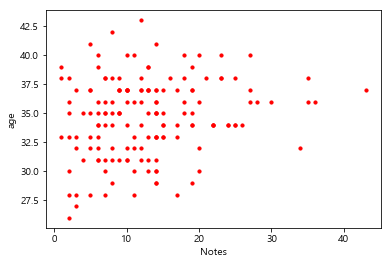

In [17]:
print(df_merge.shape)
df_merge.plot(kind='scatter',x='Notes',y='age',c='red',s=10)
plt.show()

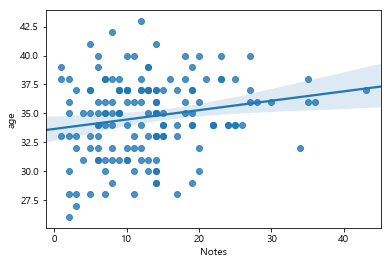

In [18]:
sns.regplot(x='Notes',y='age',data=df_merge)
plt.show()

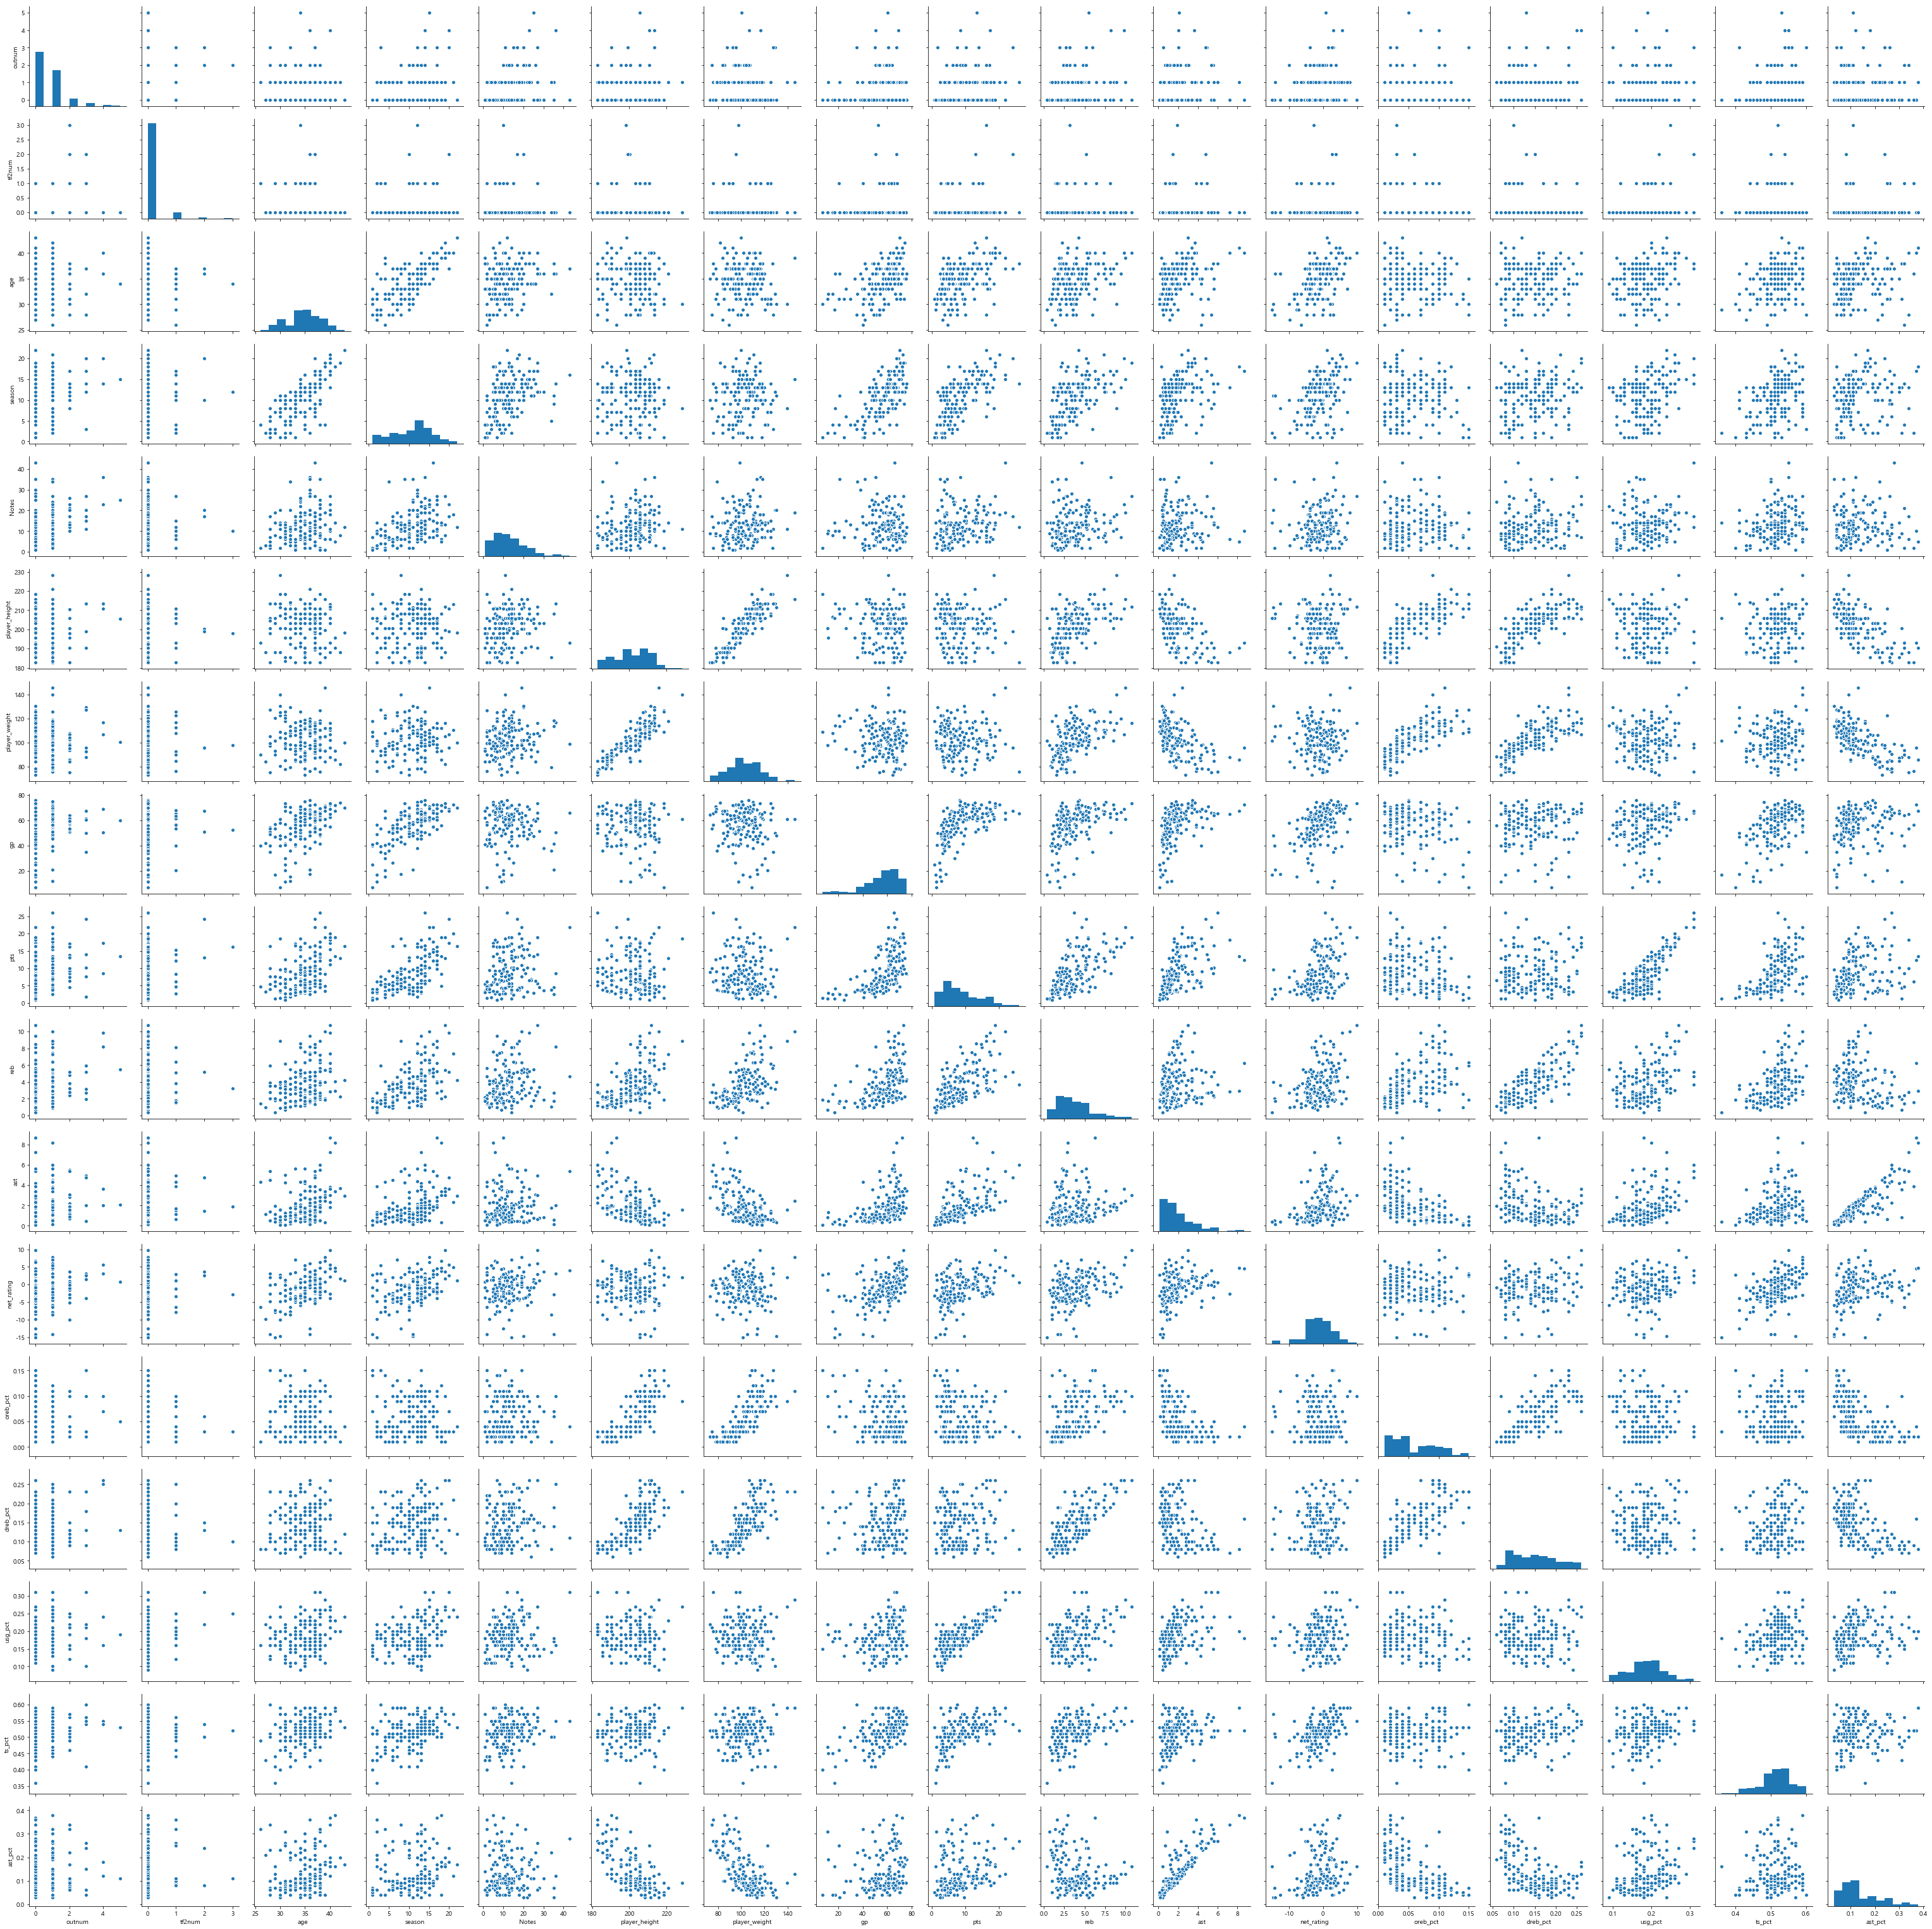

In [19]:
sns.pairplot(df_merge)
plt.show()

In [20]:
X = df_merge.drop(['age','Relinquished','position'],axis=1)
y = df_merge['age']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=10)

In [22]:
print(f'X_train : {len(X_train)}\nX_test : {len(X_test)}')

X_train : 125
X_test : 32


In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_merge['position'])
digit = encoder.transform(df_merge['position'])
df_merge['position_label'] = digit

In [24]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
r_square = lr_model.score(X_test, y_test)
print(f'결정계수 : {r_square}')

결정계수 : 0.010717208899175601


In [26]:
print('기울기 : ', lr_model.coef_)
print('졀편 : ', lr_model.intercept_)

기울기 :  [-0.59741338 -0.17372362  0.72034263 -0.05059755  0.03156386 -0.03173942
 -0.05520738 -0.2687733  -0.06240254  0.27431276  0.13490803 -6.37236761
  2.63279318 23.39659172 13.48569785 -6.493875  ]
졀편 :  19.634348024790757


In [27]:
y_pred = lr_model.predict(X)

In [28]:
data_pre = pd.DataFrame({
        '예측값' : np.ravel(y_pred),
        '실제값' : y
})
data_pre.head()

예측값  실제값
0  34.826186   35
1  32.596587   30
2  28.376485   29
3  33.754659   35
4  38.062907   35

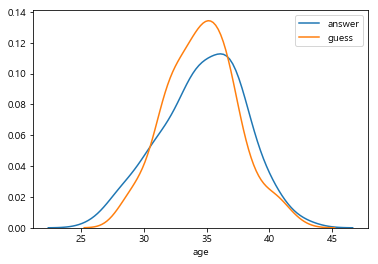

In [29]:
sns.distplot(y, hist=False, label='answer')
sns.distplot(y_pred, hist=False, label='guess')
plt.show()

# Tensorflow Regression

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import seaborn as sns

print(tf.__version__)

2.1.0


In [15]:
df_merge.isna().sum()

Relinquished     0
outnum           0
tf2num           0
age              0
season           0
Notes            0
position         0
player_height    0
player_weight    0
gp               0
pts              0
reb              0
ast              0
net_rating       0
oreb_pct         0
dreb_pct         0
usg_pct          0
ts_pct           0
ast_pct          0
dtype: int64

In [17]:
df_merge.columns

Index(['Relinquished', 'outnum', 'tf2num', 'age', 'season', 'Notes',
       'position', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

In [16]:
train_set = df_merge.sample(frac=.8, random_state=0)
test_set = df_merge.drop(train_set.index)

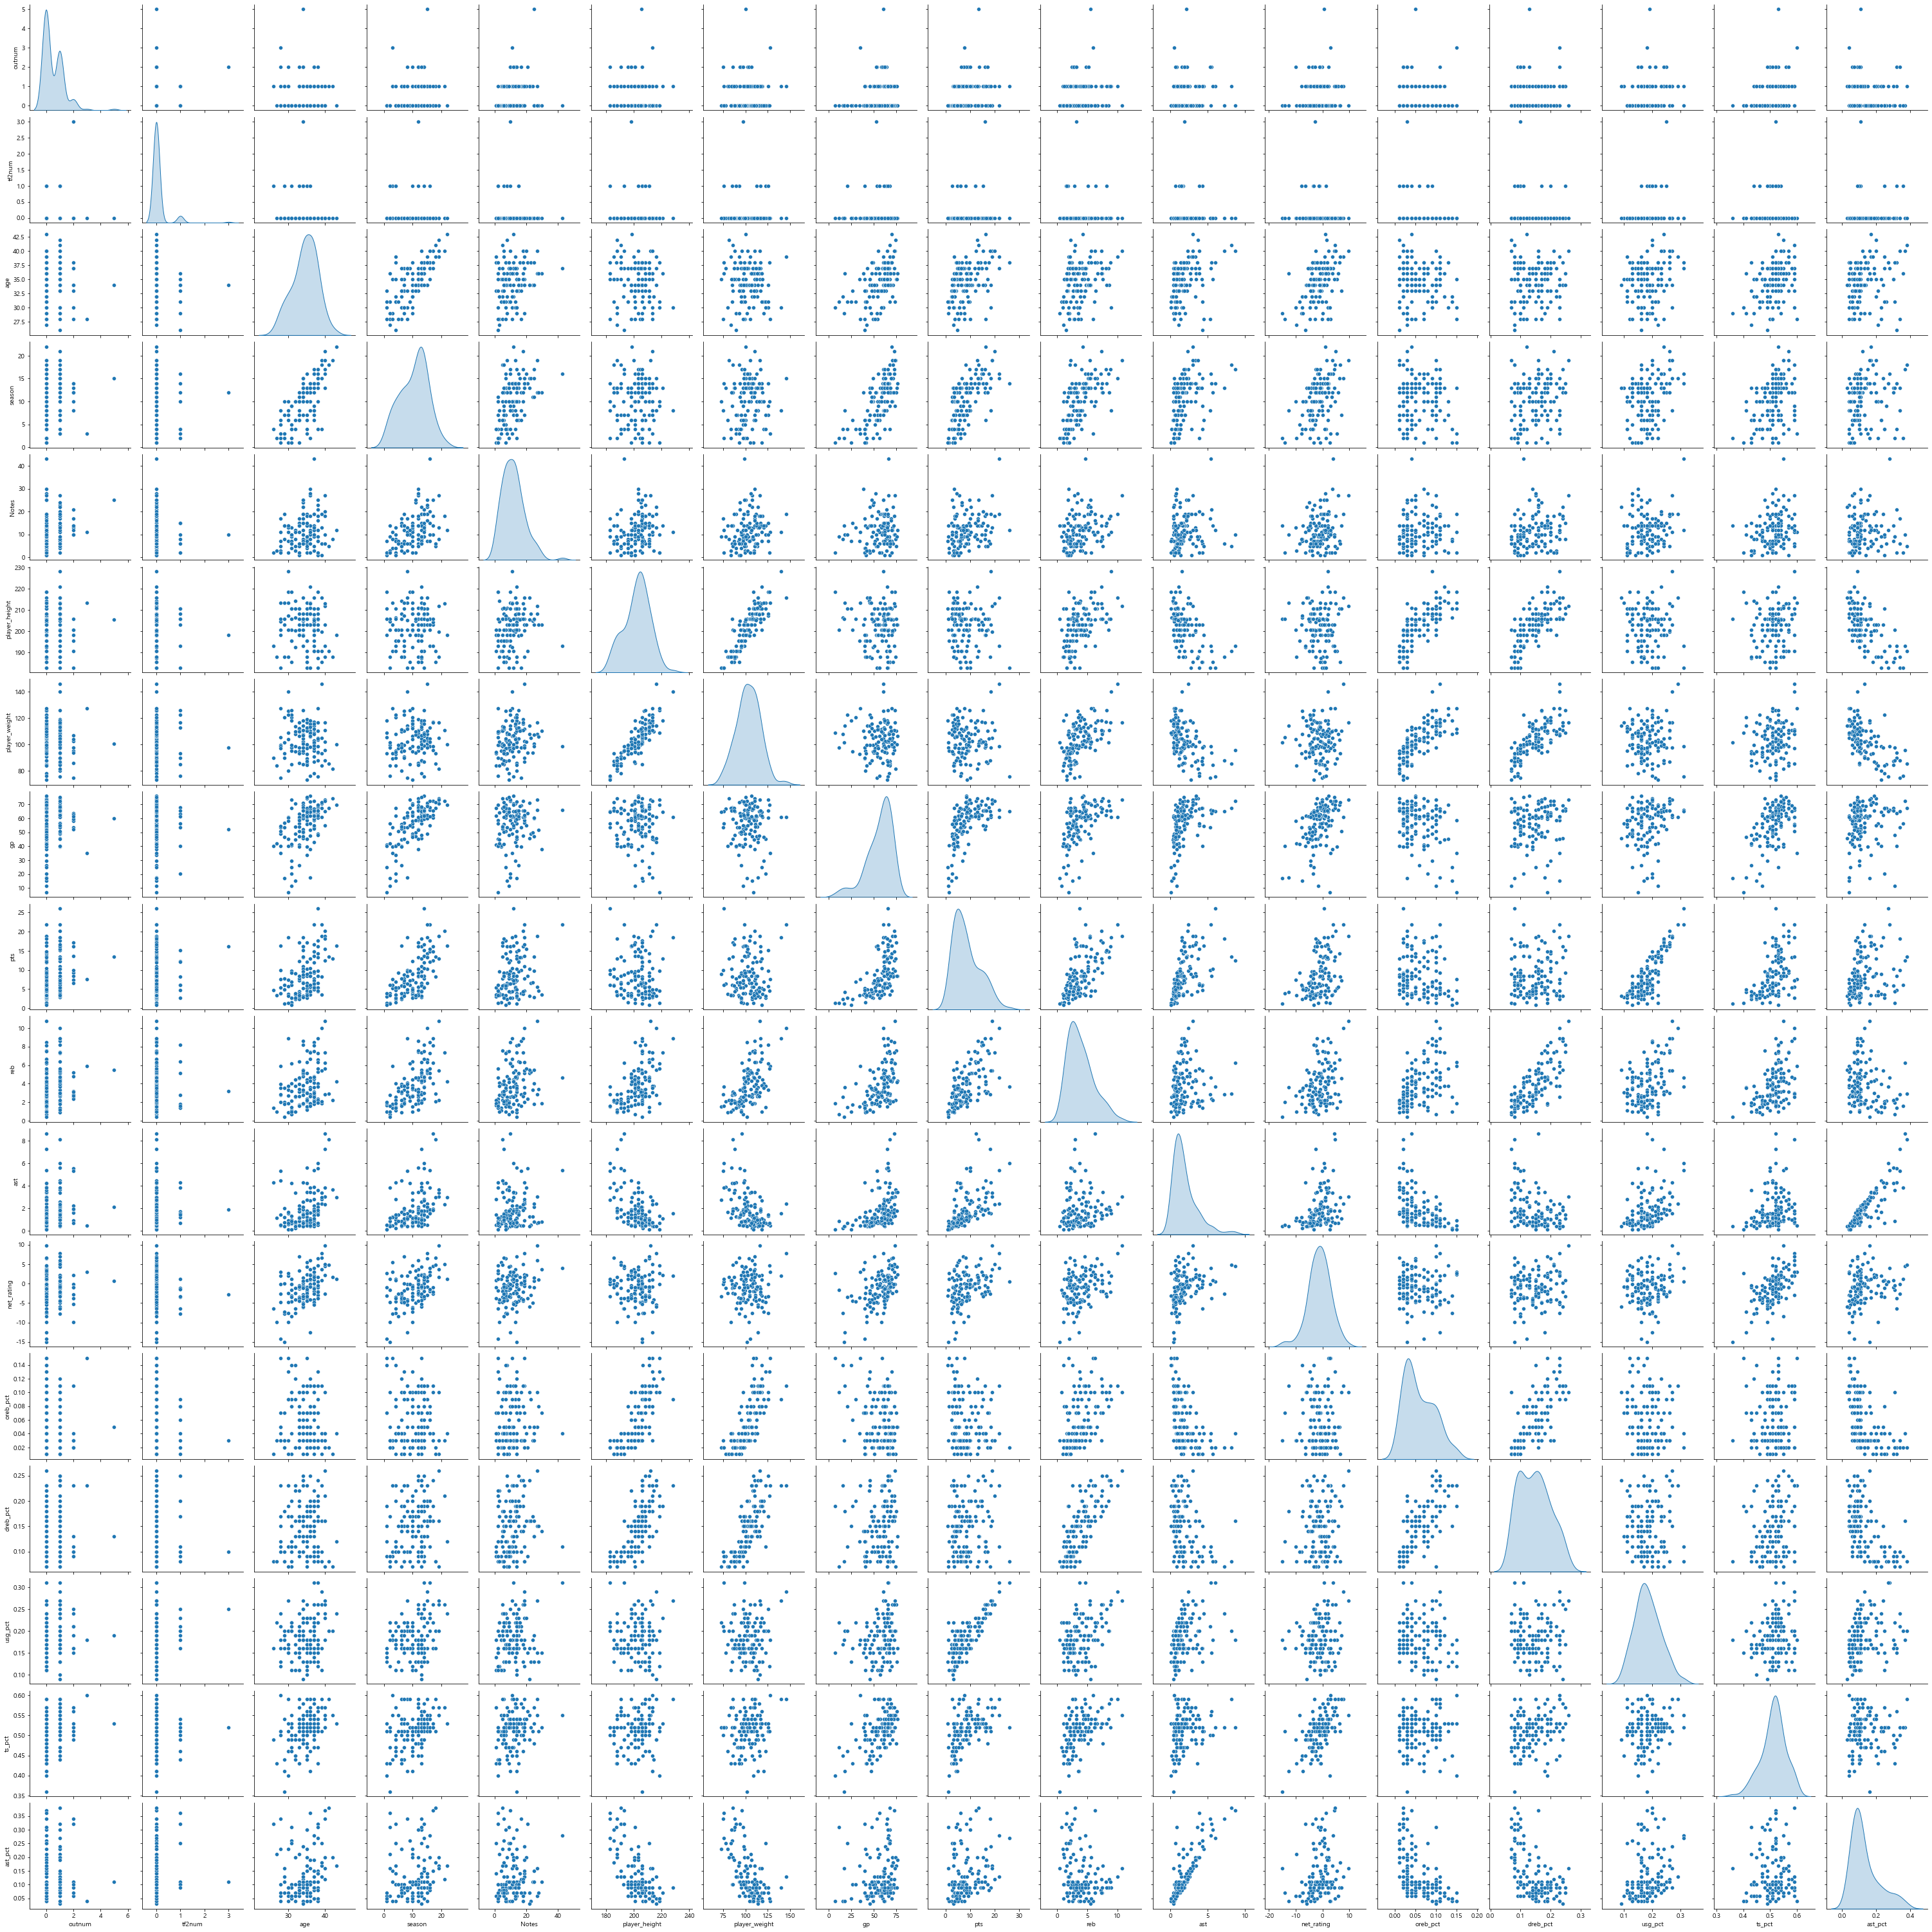

In [20]:
sns.pairplot(train_set[['Relinquished', 'outnum', 'tf2num', 'age', 'season', 'Notes',
       'position', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast',
       'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']], diag_kind='kde')